In [1]:
from keras.layers import Dense, MaxPool2D, Conv2D, Input, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.utils.np_utils import to_categorical
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

Using plaidml.keras.backend backend.


In [2]:
batch_size = 32

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, vertical_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size=batch_size)
steps_per_epoch = x_train[0] // batch_size

In [6]:
input1 = Input((28, 28, 1))
x = Conv2D(32, (3,3), strides=2, padding="valid", activation="relu")(input1)
x = Conv2D(64, (3,3), strides=2, padding="valid", activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, padding="valid", activation="relu")(x)
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dense(30, activation="relu")(x)
x = Dense(10, activation="softmax")(x)

INFO:plaidml:Opening device "metal_amd_radeon_pro_555x.0"


In [7]:
model = Model(input1, x)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [8]:
model.fit_generator(train_generator, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.8260 - acc: 0.6853 - val_loss: 0.5729 - val_acc: 0.7834
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5862 - acc: 0.7764 - val_loss: 0.5363 - val_acc: 0.7971
Epoch 3/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5188 - acc: 0.8036 - val_loss: 0.4535 - val_acc: 0.8295
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4777 - acc: 0.8198 - val_loss: 0.4650 - val_acc: 0.8280
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.4487 - acc: 0.8313 - val_loss: 0.4159 - val_acc: 0.8423
Epoch 6/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4284 - acc: 0.8388 - val_loss: 0.4126 - val_acc: 0.8416
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4161 - acc: 0.8440 - val_loss: 0.4302 - val_acc: 0.8408
Epoch 8/10
1875/1875 [==========================

In [30]:
labels = '''
Trouser/pants
Pullover shirt
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot
T-shirt/top
'''.split()

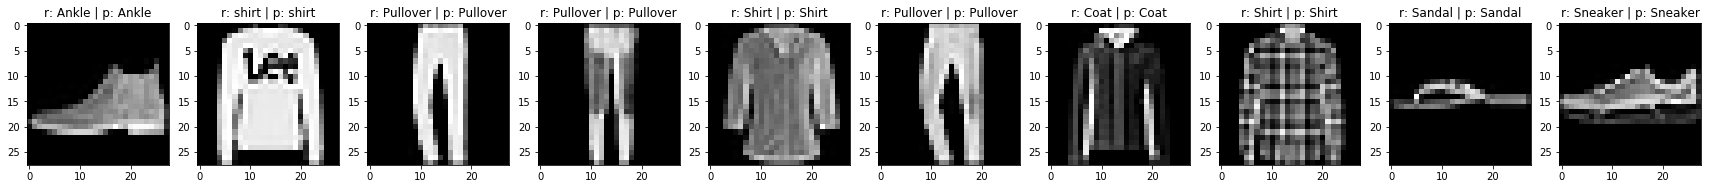

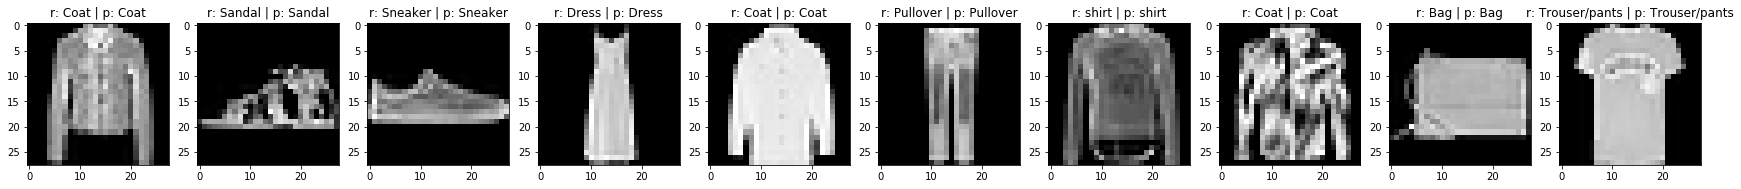

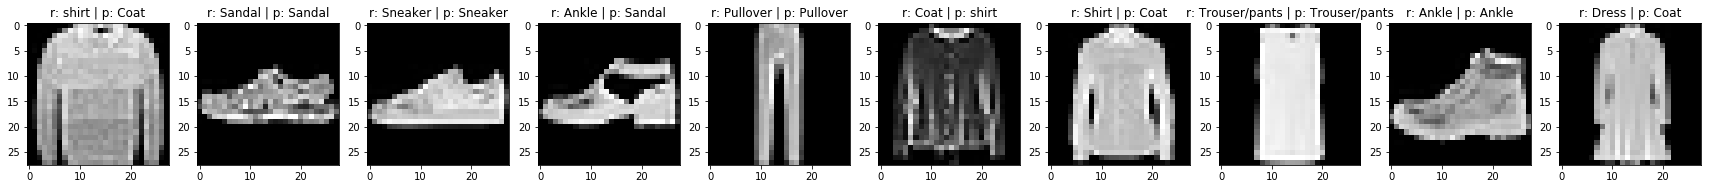

In [32]:
predict = np.argmax(model.predict(x_test), axis=1)
for x in range(3):
  sub = 1
  counter = 1
  plt.figure(figsize=(30, 100))
  for i in range((x) * 10, ((x+1) * 10)):
    plt.subplot(1, 10,  counter)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title("r: " + labels[y_test[i]] + ' | p: ' + labels[predict[i]])
    counter += 1
  plt.show()